# Modeling the 2016 US Presidential Election using K-nearest Neighbors

*Method inspired by [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

## Loading the data:

In [2]:
import pandas as pd
from constants import *

census_data = pd.read_csv('combined_data.csv')

X = census_data[feature_cols]
y = census_data['Democrat']

## Hyperparameter Optimization:

### Tuning single parameters with cross_val_score:

The code below runs 10-fold cross-validation for each value K (for KNN) from 1 to 40. The average score for each value is calculated and printed below.

In [3]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# search for an optimal value of K for KNN
k_range = list(range(1, 41))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.81972362973665347, 0.85215520418568791, 0.84674118498664208, 0.8594709651495227, 0.85469082972450838, 0.85946388154849518, 0.85246760294235924, 0.8578684788798544, 0.85977729132528591, 0.85754898360177045, 0.85977628030516651, 0.8578603713383226, 0.86072460425668551, 0.85945375196672491, 0.86008765512133378, 0.85945680440766004, 0.86008968362176486, 0.86072866125754754, 0.86104612157500782, 0.86009070110207664, 0.86295088347976967, 0.8626344341824288, 0.8626334231623094, 0.86168104220992847, 0.8616790137094974, 0.86104611511481544, 0.86199950708731554, 0.86072866125754754, 0.86041018991996787, 0.85945881998770624, 0.85945679148727516, 0.85850643903532531, 0.85850339951477506, 0.85723457572524553, 0.85850644549551769, 0.85691813288809693, 0.85659864407020547, 0.85596271241516553, 0.856596622029967, 0.85564626311782455]


For ease of interpretation, we plot the accuracy scores for each value of K. We see that 21 yields the highest out-of-sample accuracy:

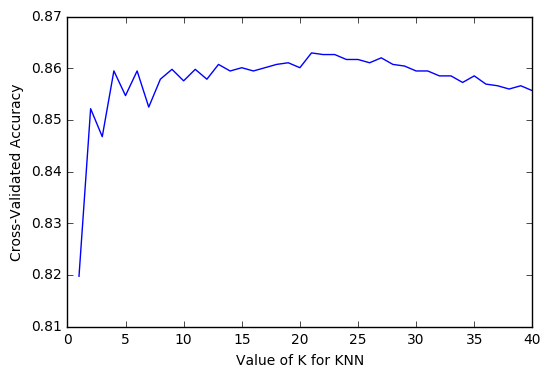

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Tuning multiple parameters with GridSearchCV

GridSearchCV allows us to perform the same cross-validation testing with multiple parameters at once. Below, we find the optimal combination of K value (for KNN) and leaf_size:

In [5]:
from sklearn.grid_search import GridSearchCV

# define the parameter values that should be searched
k_range = list(range(1, 41))
leaf_size_range = list(range(20, 50))

param_grid = dict(n_neighbors=k_range, leaf_size=leaf_size_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.862957074722
{'n_neighbors': 21, 'leaf_size': 20}
KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')


## K-folds cross-validation:

Using the optimal hyper parameters found in the previous steps, we can calcluate the average out-of-sample accuracy for KNN. We find that KNN produces a model with predictions that are ~87.5% accurate.

In [6]:
# 10-fold cross-validation with K=31 for KNN
knn = KNeighborsClassifier(n_neighbors=21, leaf_size=20)
scores = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')

print(scores.mean())

0.789197266969
